<a href="https://colab.research.google.com/github/piyushyadav112233/DBSCAN-/blob/main/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris



In [6]:
# Load the dataset of irish
iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head(30)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [9]:
print(iris.DESCR)
print(iris.feature_names)
print(iris.target_names)
print(iris.data)
print(iris.target)
print(iris.filename)
print(iris.frame)
print(iris.data.shape)
print(iris.target.shape)
print(iris.feature_names)
print(iris.target_names)
print(iris.DESCR)
print(iris.data.shape)
print(iris.target.shape)
print(iris.feature_names)
print(iris.target_names)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [11]:
print(df.info()) # Changed 'irish' to 'df'
print(df.describe()) # Changed 'irish' to 'df'
print(df.isnull().sum) # Changed 'irish' to 'df'
print(df.dtypes) # Changed 'irish' to 'df'
print(df.head(30)) # Changed 'irish' to 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000      

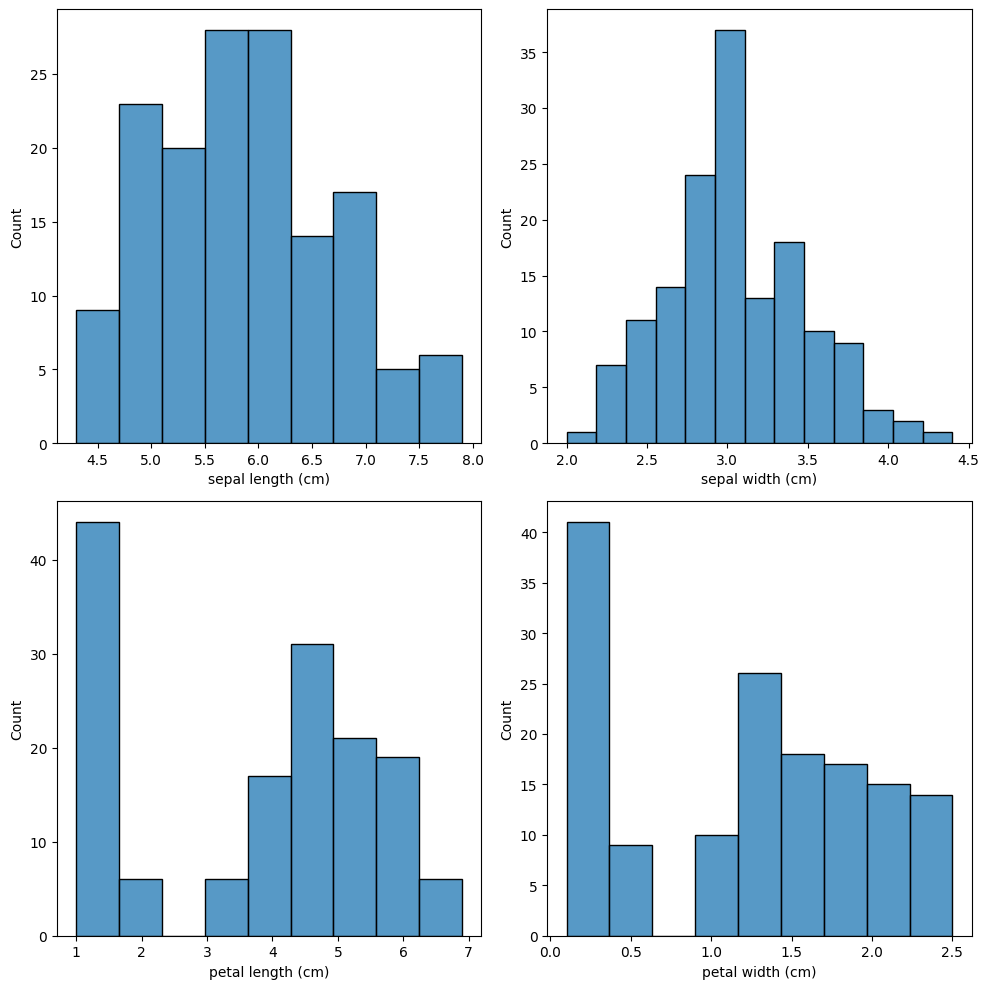

In [12]:
#Exploratory Data Analysis (EDA)
#hist
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(df['sepal length (cm)'], ax=axs[0, 0])
sns.histplot(df['sepal width (cm)'], ax=axs[0, 1])
sns.histplot(df['petal length (cm)'], ax=axs[1, 0])
sns.histplot(df['petal width (cm)'], ax=axs[1, 1])
plt.tight_layout()
plt.show()



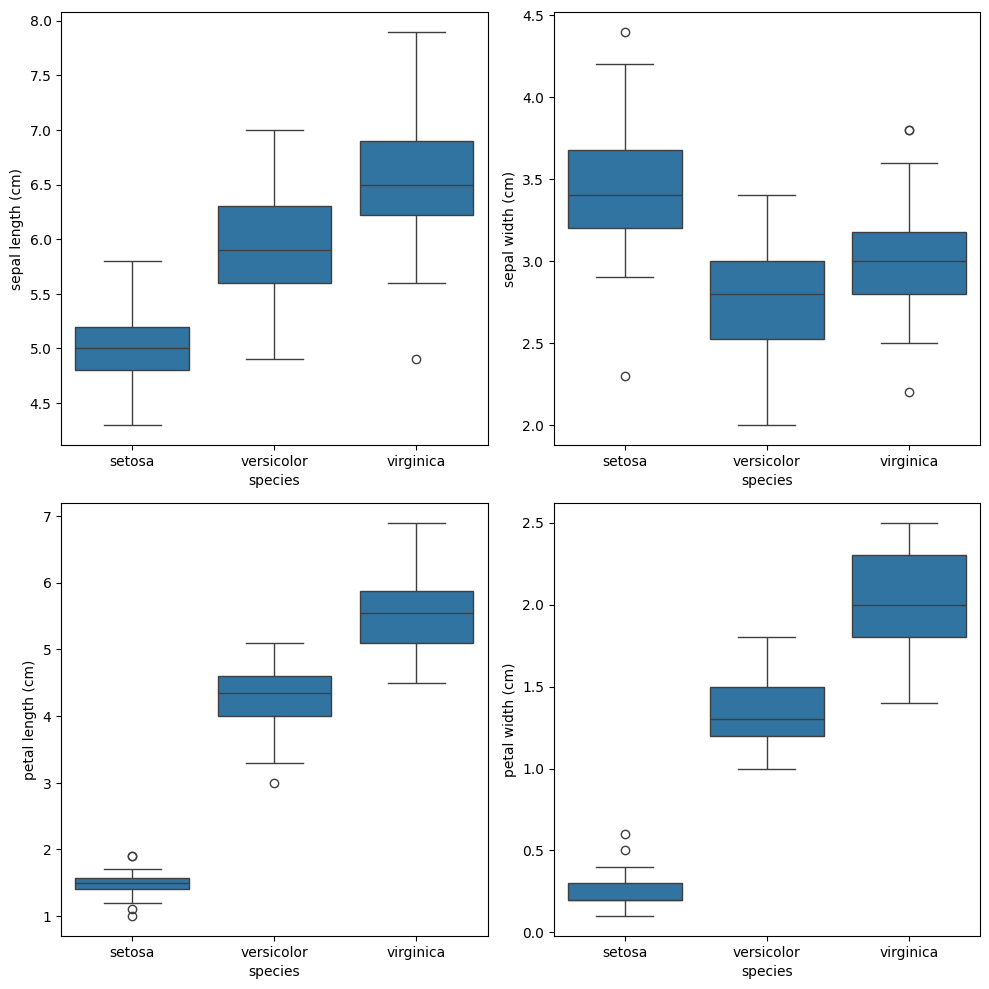

In [13]:
#boxplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(x='species', y='sepal length (cm)', data=df, ax=axs[0, 0])
sns.boxplot(x='species', y='sepal width (cm)', data=df, ax=axs[0, 1])
sns.boxplot(x='species', y='petal length (cm)', data=df, ax=axs[1, 0])
sns.boxplot(x='species', y='petal width (cm)', data=df, ax=axs[1, 1])
plt.tight_layout()
plt.show()

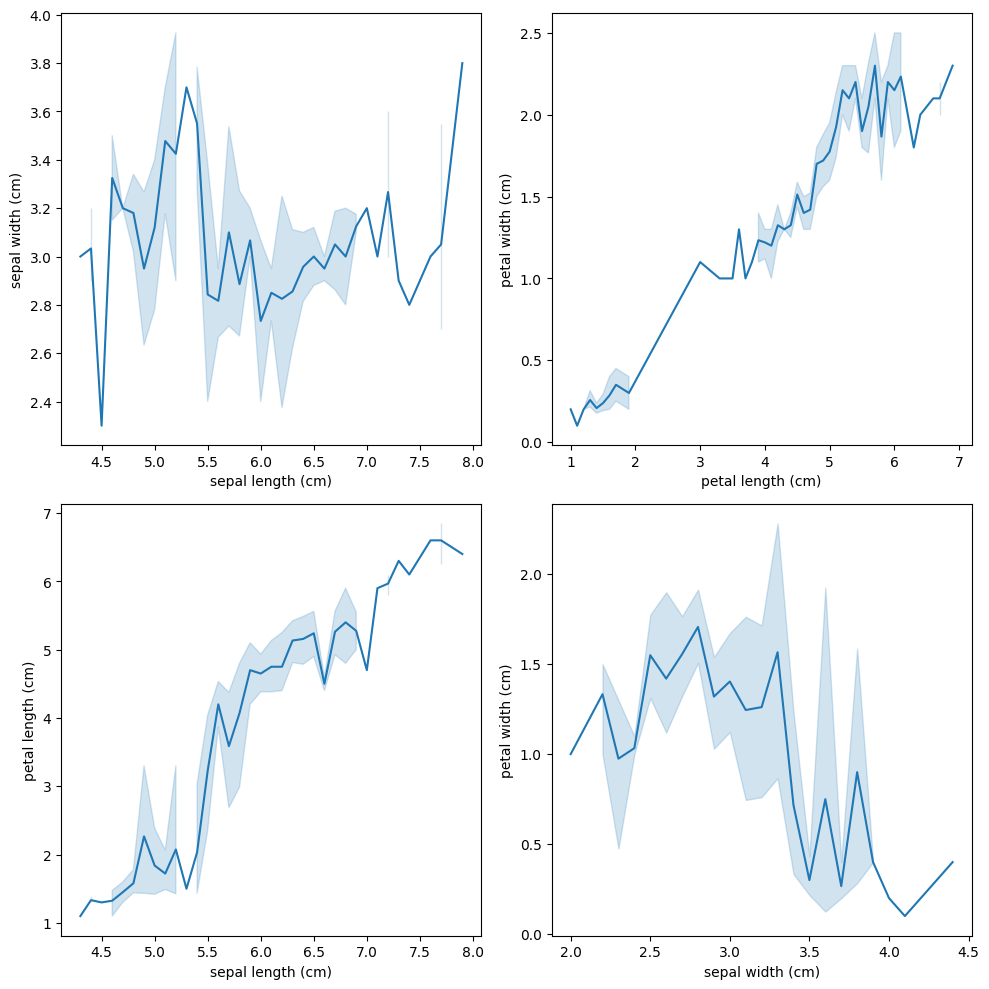

In [14]:
#line plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x='sepal length (cm)', y='sepal width (cm)', data=df, ax=axs[0, 0])
sns.lineplot(x='petal length (cm)', y='petal width (cm)', data=df, ax=axs[0, 1])
sns.lineplot(x='sepal length (cm)', y='petal length (cm)', data=df, ax=axs[1, 0])
sns.lineplot(x='sepal width (cm)', y='petal width (cm)', data=df, ax=axs[1, 1])
plt.tight_layout()
plt.show()

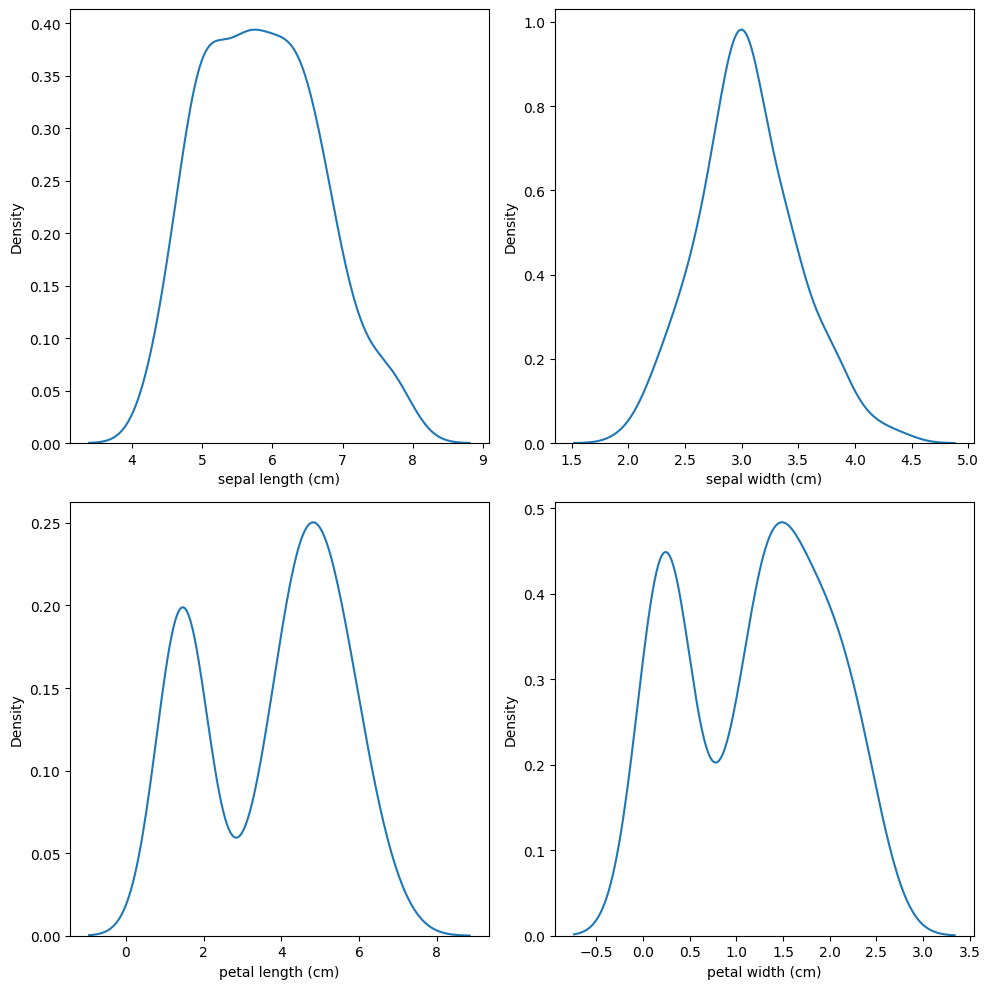

In [15]:
#kde plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.kdeplot(x='sepal length (cm)', data=df, ax=axs[0, 0])
sns.kdeplot(x='sepal width (cm)', data=df, ax=axs[0, 1])
sns.kdeplot(x='petal length (cm)', data=df, ax=axs[1, 0])
sns.kdeplot(x='petal width (cm)', data=df, ax=axs[1, 1])
plt.tight_layout()
plt.show()

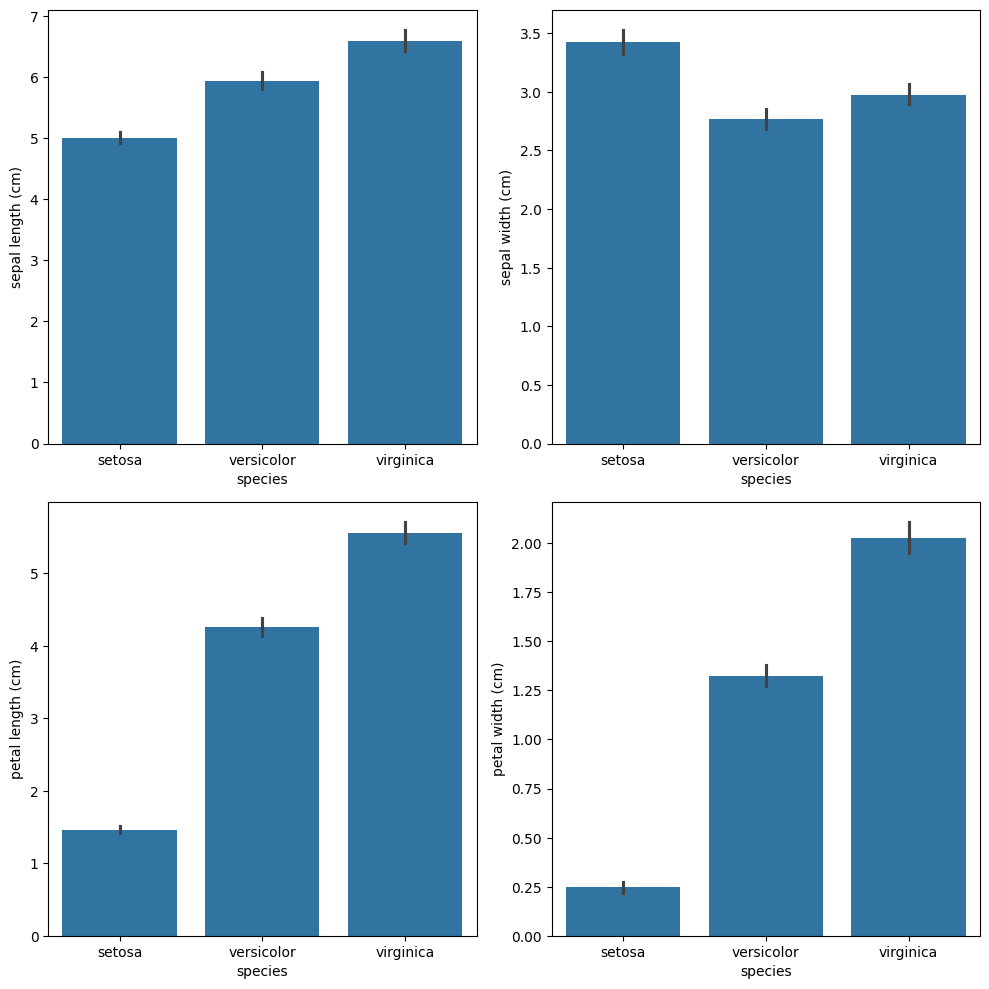

In [16]:
#barplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.barplot(x='species', y='sepal length (cm)', data=df, ax=axs[0, 0])
sns.barplot(x='species', y='sepal width (cm)', data=df, ax=axs[0, 1])
sns.barplot(x='species', y='petal length (cm)', data=df, ax=axs[1, 0])
sns.barplot(x='species', y='petal width (cm)', data=df, ax=axs[1, 1])
plt.tight_layout()
plt.show()


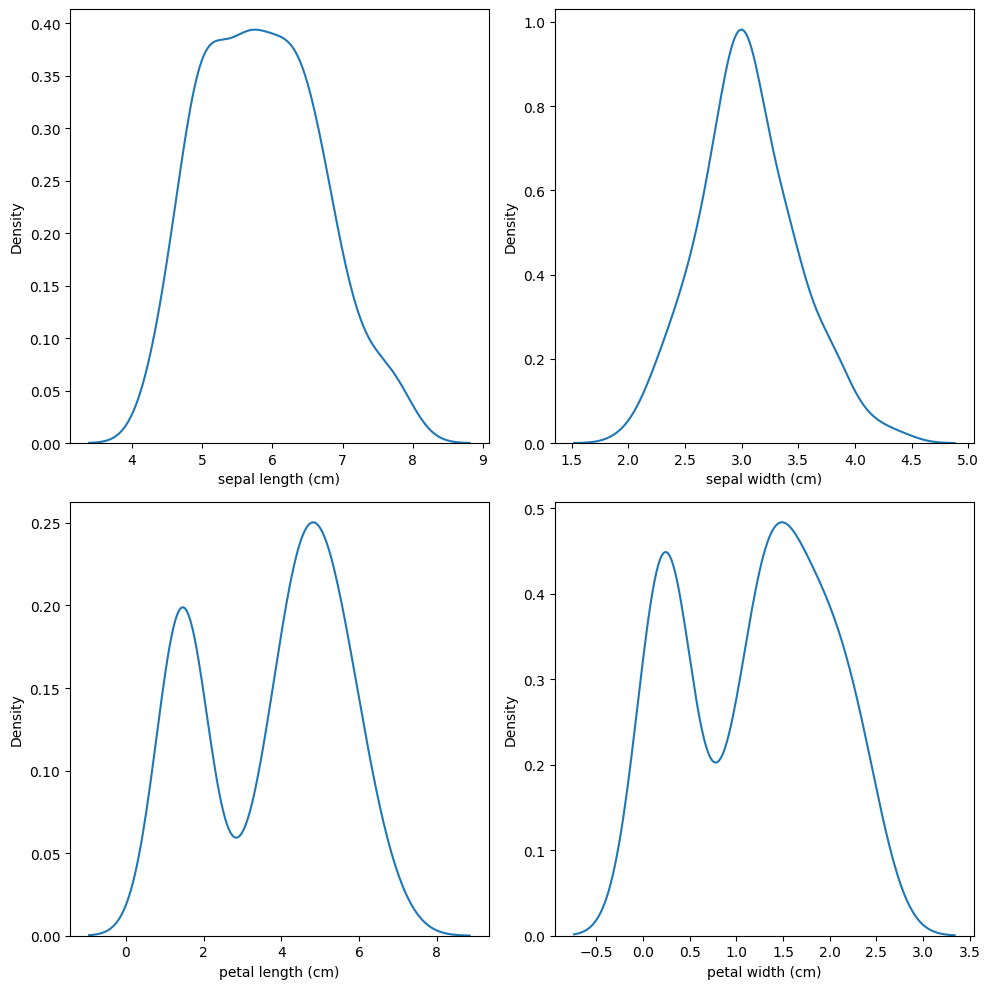

In [17]:
#density plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.kdeplot(x='sepal length (cm)', data=df, ax=axs[0, 0])
sns.kdeplot(x='sepal width (cm)', data=df, ax=axs[0, 1])
sns.kdeplot(x='petal length (cm)', data=df, ax=axs[1, 0])
sns.kdeplot(x='petal width (cm)', data=df, ax=axs[1, 1])
plt.tight_layout()
plt.show()

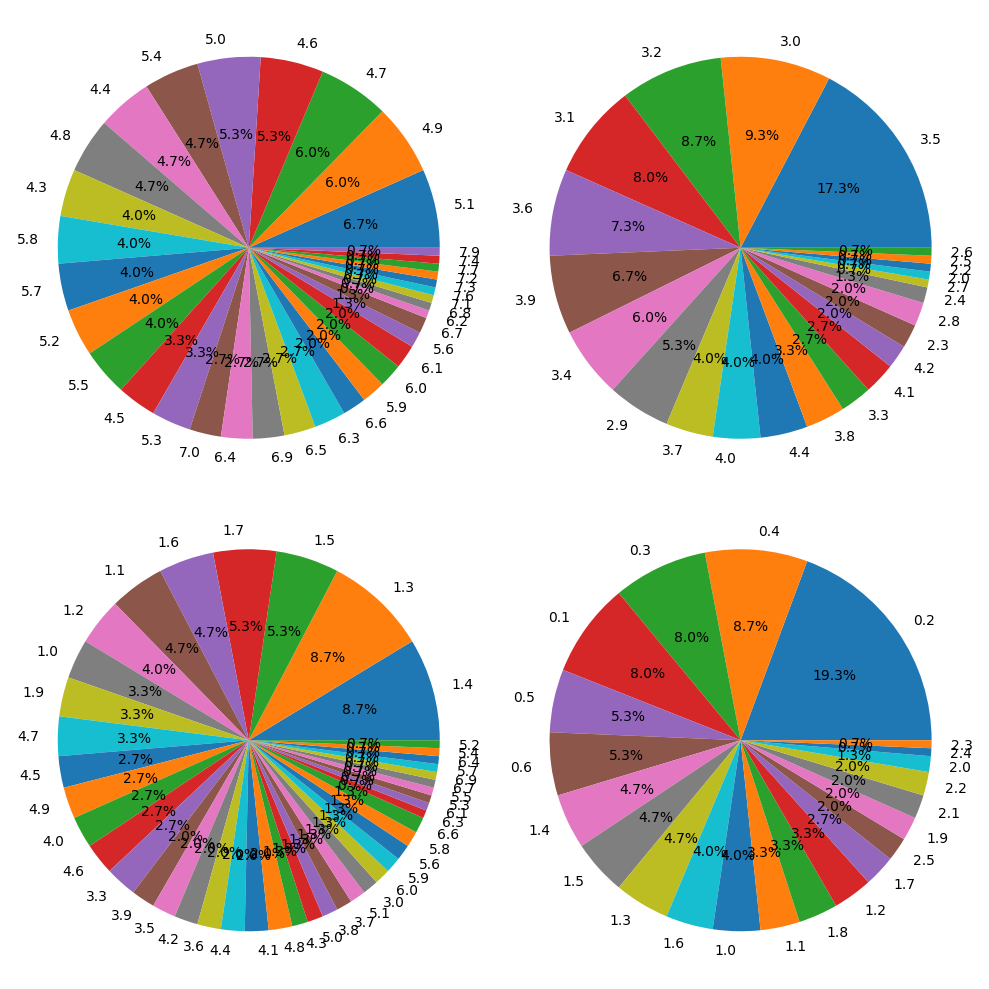

In [18]:
#pie chart
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].pie(df['sepal length (cm)'].value_counts(), labels=df['sepal length (cm)'].unique(), autopct='%1.1f%%')
axs[0, 1].pie(df['sepal width (cm)'].value_counts(), labels=df['sepal width (cm)'].unique(), autopct='%1.1f%%')
axs[1, 0].pie(df['petal length (cm)'].value_counts(), labels=df['petal length (cm)'].unique(), autopct='%1.1f%%')
axs[1, 1].pie(df['petal width (cm)'].value_counts(), labels=df['petal width (cm)'].unique(), autopct='%1.1f%%')
plt.tight_layout()
plt.show()


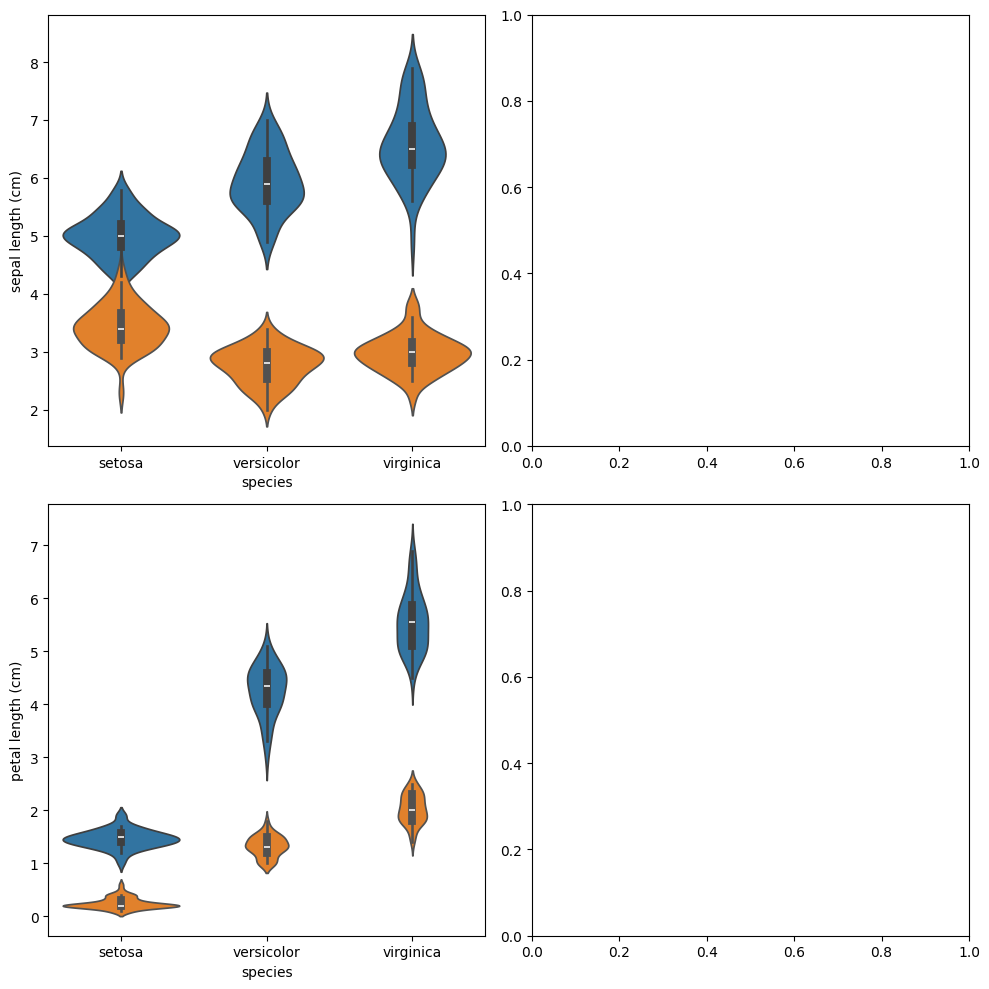

In [19]:
#rainbow plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.violinplot(x='species', y='sepal length (cm)', data=df, ax=axs[0, 0])
sns.violinplot(x='species', y='sepal width (cm)', data=df, ax=axs[0,0])
sns.violinplot(x='species', y='petal length (cm)', data=df, ax=axs[1,0])
sns.violinplot(x='species', y='petal width (cm)', data=df, ax=axs[1,0])
plt.tight_layout()
plt.show()

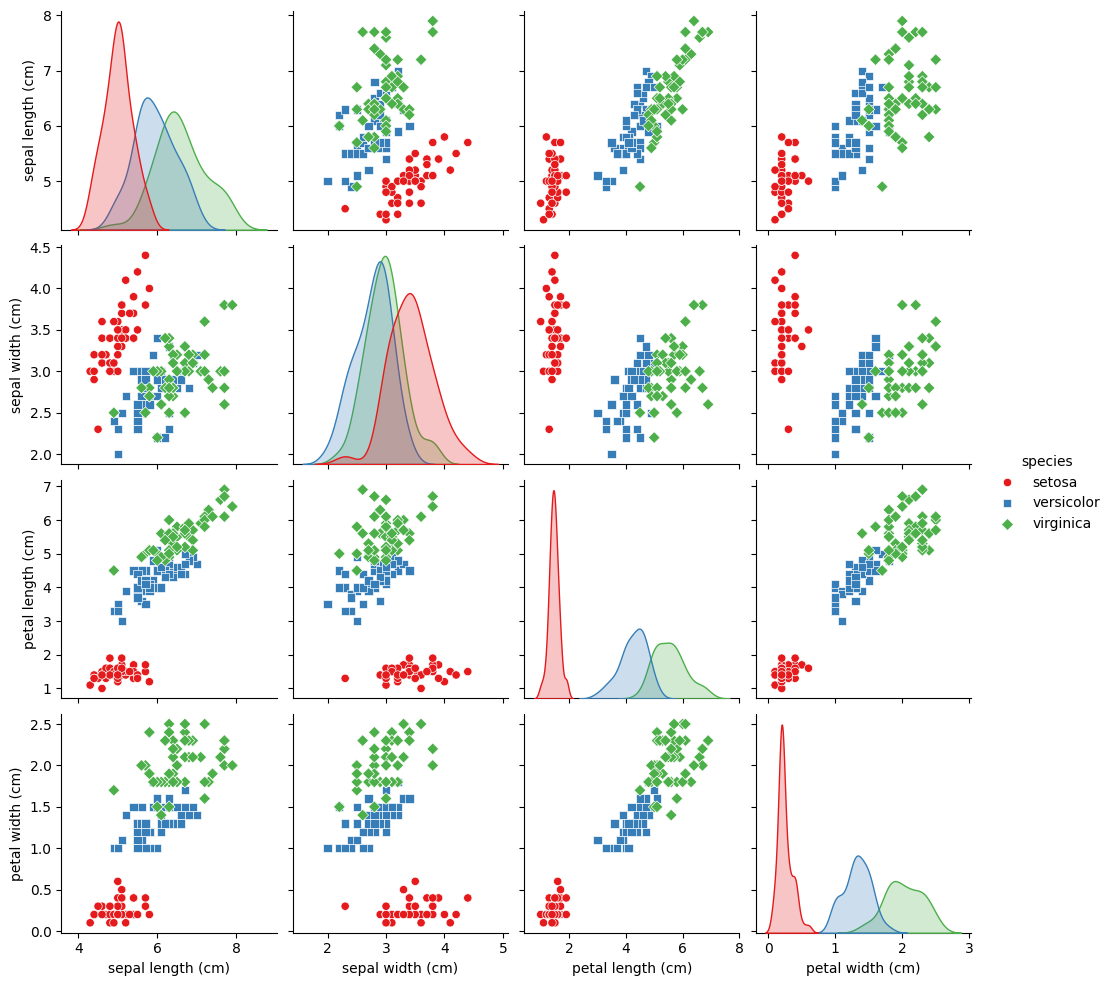

In [20]:
#pairplot
sns.pairplot(df, hue='species', diag_kind='kde', markers=['o', 's', 'D'], palette='Set1')
plt.show()

In [21]:
#3d plot
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='species', symbol='species')
fig.show()

In [23]:
#Data Preprocessing
# Encode categorical target variable (convert species to numerical values)
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df['petal length (cm)'] = label_encoder.fit_transform(df['petal length (cm)'])
df['petal width (cm)'] = label_encoder.fit_transform(df['petal width (cm)'])
df['sepal length (cm)'] = label_encoder.fit_transform(df['sepal length (cm)'])
df['sepal width (cm)'] = label_encoder.fit_transform(df['sepal width (cm)'])
df.head(50)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0
5,11,18,7,3,0
6,3,13,4,2,0
7,7,13,5,1,0
8,1,8,4,1,0
9,6,10,5,0,0


In [24]:
# Define features (X) and target (y)
X = df.iloc[:, :-2]  # Select all feature columns
y = df['species']

In [25]:
X

,sepal length (cm),sepal width (cm),petal length (cm)
0,8,14,4
1,6,9,4
2,4,11,3
3,3,10,5
4,7,15,4
...,...,...,...
145,24,9,28
146,20,4,26
147,22,9,28
148,19,13,30


In [26]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [27]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)
22                   3                15                  0
15                  14                22                  5
65                  24                10                 20
11                   5                13                  6
42                   1                11                  3
..                 ...               ...                ...
71                  18                 7                 16
106                  6                 4                 21
14                  15                19                  2
92                  15                 5                 16
102                 28                 9                 35

[120 rows x 3 columns]
     sepal length (cm)  sepal width (cm)  petal length (cm)
73                  18                 7                 23
18                  14                17                  7
118                 33                 5                 42
78              

In [30]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)



[[-1.48328674  1.21535974 -1.55579646]
 [-0.13018481  2.79570367 -1.12121644]
 [ 1.09990786  0.08654264  0.18252361]
 [-1.2372682   0.7638329  -1.03430044]
 [-1.72930527  0.31230606 -1.29504845]
 [ 0.60787079 -1.26803787  0.70401963]
 [ 0.73088006  0.31230606  0.26943961]
 [-0.74523114  0.98959632 -1.12121644]
 [-0.99124967  1.21535974 -1.20813245]
 [-0.74523114  2.34417683 -1.12121644]
 [-0.00717554 -0.81651103  0.79093563]
 [ 0.23884299  0.7638329   0.26943961]
 [ 1.09990786  0.08654264  0.44327162]
 [-0.49921261  1.89264999 -1.29504845]
 [-0.49921261  1.44112316 -1.12121644]
 [-0.37620334 -1.49380129 -0.42588842]
 [ 0.60787079 -0.59074761  0.79093563]
 [ 0.73088006  0.08654264  1.13859964]
 [ 0.97689859 -0.13922077  0.18252361]
 [ 1.71495419  1.21535974  1.66009566]
 [-0.13018481 -0.36498419  0.0086916 ]
 [ 2.08398199 -0.13922077  1.92084367]
 [-0.25319407 -0.13922077  0.26943961]
 [-0.86824041  0.98959632 -1.20813245]
 [ 2.20699125 -0.59074761  2.00775967]
 [-0.00717554 -0.81651103

In [31]:
# Convert back to DataFrame for better readability
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


In [32]:
# Display preprocessed data
print("Preprocessed Training Data:")
print(X_train)
print("\nPreprocessed Testing Data:")
print(X_test)

Preprocessed Training Data:
     sepal length (cm)  sepal width (cm)  petal length (cm)
0            -1.483287          1.215360          -1.555796
1            -0.130185          2.795704          -1.121216
2             1.099908          0.086543           0.182524
3            -1.237268          0.763833          -1.034300
4            -1.729305          0.312306          -1.295048
..                 ...               ...                ...
115           0.361852         -0.590748          -0.165140
116          -1.114259         -1.268038           0.269440
117          -0.007176          2.118413          -1.381964
118          -0.007176         -1.042274          -0.165140
119           1.591945         -0.139221           1.486264

[120 rows x 3 columns]

Preprocessed Testing Data:
    sepal length (cm)  sepal width (cm)  petal length (cm)
0            0.361852         -0.590748           0.443272
1           -0.130185          1.666887          -0.947384
2            2.206991  

In [33]:
#Train a Classification Model
#logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [38]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Import RandomForestClassifier and GradientBoostingClassifier
from sklearn.svm import SVC  # Import SVC

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(kernel='linear')
}

In [39]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

In [40]:
# Model Evaluation
print("Model Evaluation:")
for name, model in models.items():
    print(f"{name}: Accuracy = {accuracy}")
    print(f"{name}: Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{name}: Classification Report:")
    print(classification_report(y_test, y_pred))
    print("=" * 50)



Model Evaluation:
Logistic Regression: Accuracy = 0.9666666666666667
Logistic Regression: Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Logistic Regression: Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Decision Tree: Accuracy = 0.9666666666666667
Decision Tree: Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Decision Tree: Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   ma

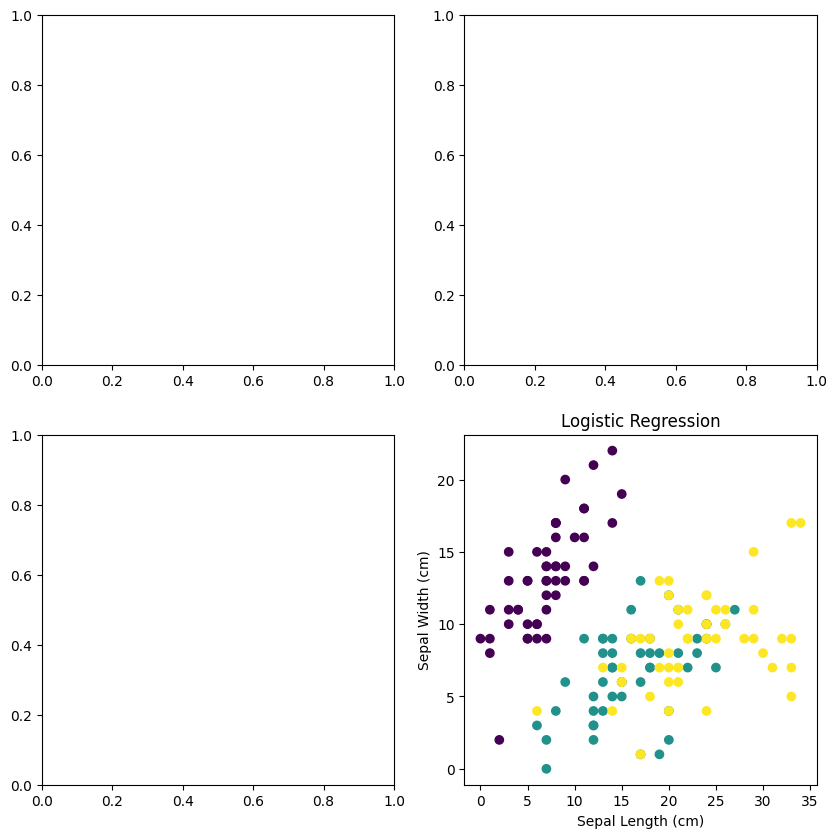

In [43]:
#visulize of model
#logistick regression
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['species'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Logistic Regression')
plt.show()

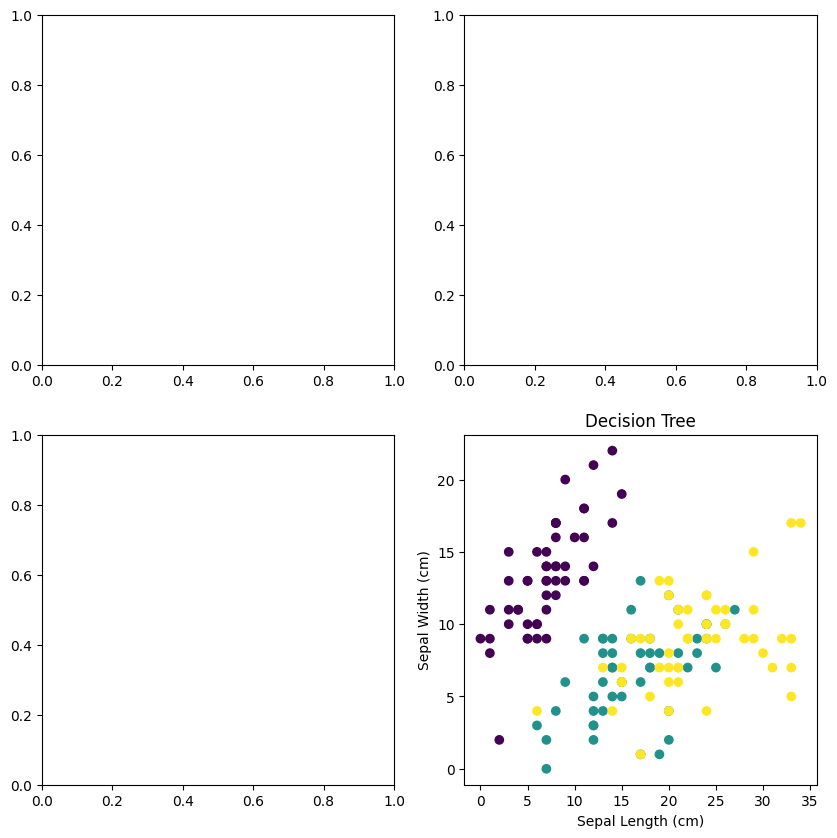

In [44]:
#DecisionTreeClassifier plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['species'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Tree')
plt.show()

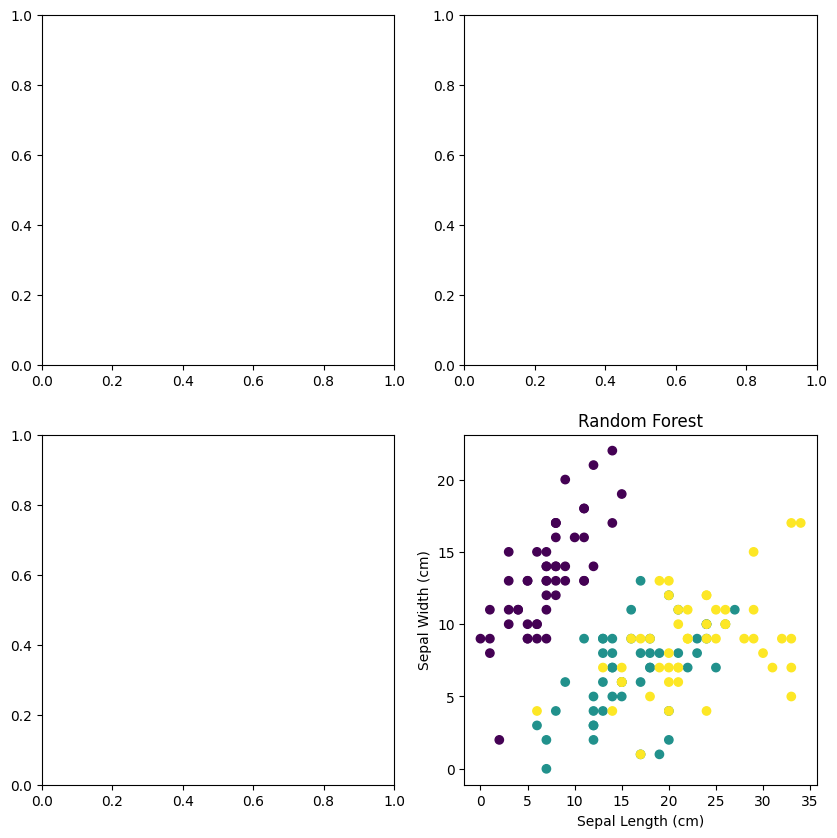

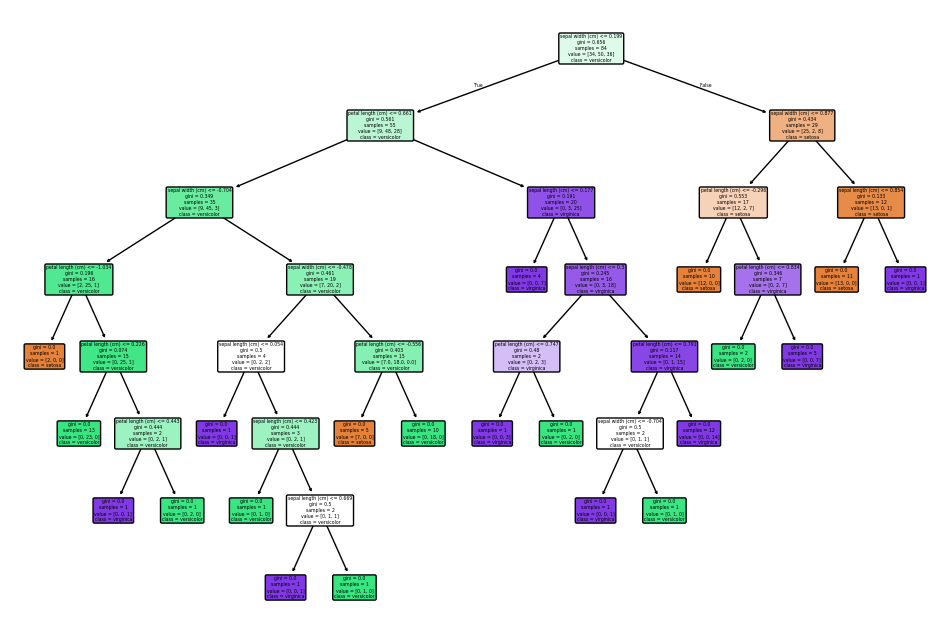

In [48]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier # Make sure RandomForestClassifier is imported

# Initialize and train a RandomForestClassifier
rf = RandomForestClassifier() # Create an instance of RandomForestClassifier
rf.fit(X_train, y_train) # Train the model using your training data

plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(rf.estimators_[0], # Visualize the first tree (index 0)
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True, rounded=True)
plt.show()

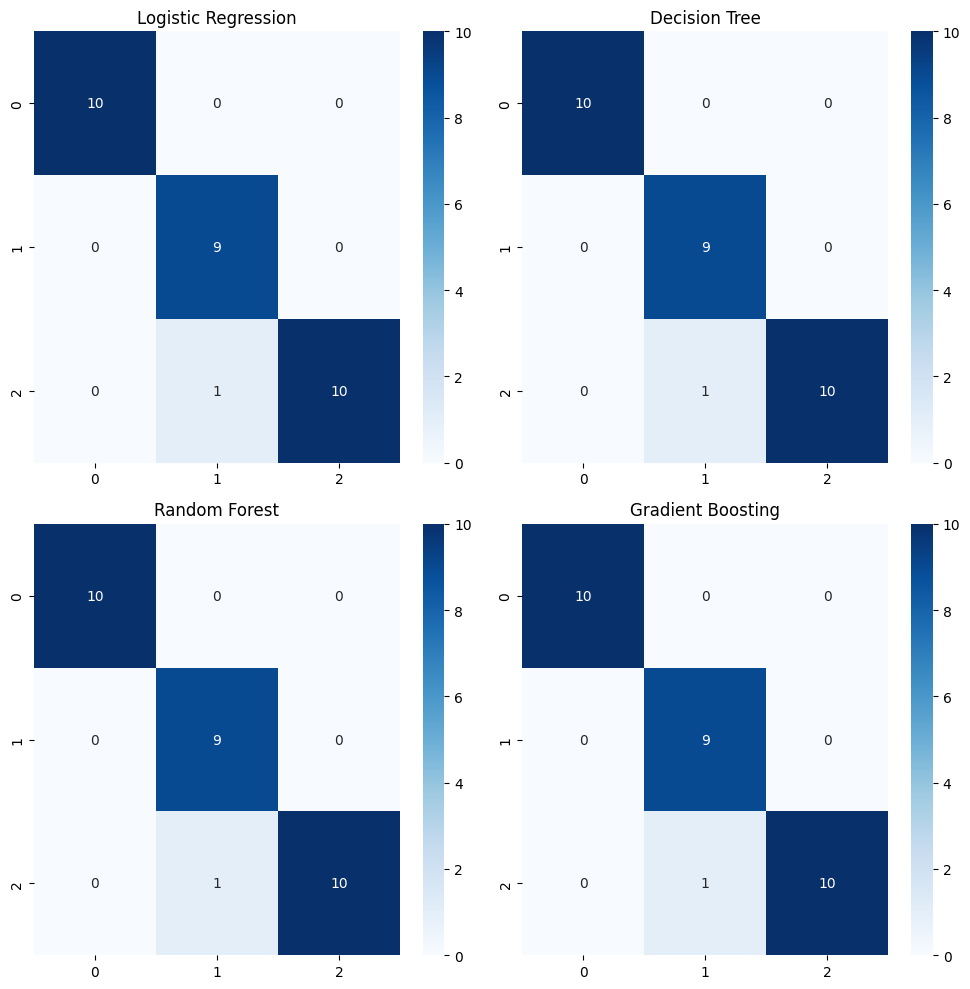

In [49]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axs[0, 1])
axs[0, 1].set_title('Decision Tree')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axs[1, 0])
axs[1, 0].set_title('Random Forest')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axs[1, 1])
axs[1, 1].set_title('Gradient Boosting')
plt.tight_layout()
plt.show()


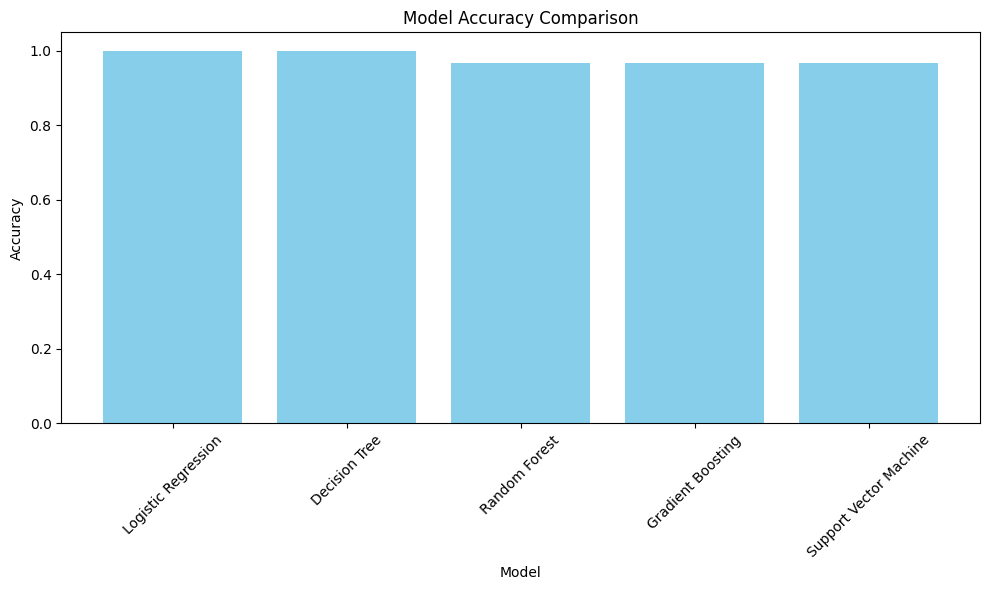

In [52]:
#2️⃣ Bar Chart Comparing Accuracy Scores
import matplotlib.pyplot as plt
# Plot model accuracy comparison
plt.figure(figsize=(10, 6))

# Calculate accuracy for each model and store in a list
accuracies = []
for name, model in models.items():
    y_pred = model.predict(X_test)  # Get predictions for the current model
    accuracies.append(accuracy_score(y_test, y_pred))  # Calculate and store accuracy

# Now plot the bar chart using the calculated accuracies
plt.bar(models.keys(), accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()